<a href="https://colab.research.google.com/github/doughboy4994/sphinx-gallery/blob/main/TEST_NOTEBOOK_FOR_BANKCHURN_(COPY_CORRUPT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")

# Select features
features = ["Total_Trans_Ct", "Total_Revolving_Bal"]
X = data[features]

# Handle missing values (example: imputation with mean)
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
data["cluster"] = kmeans.labels_

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X["Total_Trans_Ct", "Total_Revolving_Bal"], c=data["cluster"], s=50, cmap="viridis")
plt.xlabel("Total Transaction Count")
plt.ylabel("Months_on_book")
plt.title("K-means Clustering (k=6)")
plt.show()

<ipython-input-29-770ca1a8f6a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


KeyError: ('Total_Trans_Ct', 'Total_Revolving_Bal')

<Figure size 800x600 with 0 Axes>

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(X["Total_Trans_Ct"], X["Total_Revolving_Bal"], c=data["cluster"], s=50, cmap="viridis")  # Pass columns separately
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Revolving Balance")
plt.title("K-means Clustering (k=6)")  # Correct title for clarity
plt.show()


KeyError: 'Income_Category'

<Figure size 800x600 with 0 Axes>

In [20]:
# Load the dataset
data = pd.read_csv("Colab Notebooks/BankChurners.csv")

# Select features for clustering
features = ['Total_Trans_Ct', 'Total_Revolving_Bal']  # Choose relevant features
X = data[features]

# Handle any missing values (mean imputation as example)
X.fillna(X.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Set the font for plotting
import matplotlib.font_manager as fm
font_path = "Colab Notebooks/BankChurners.csv"

font_prop = fm.FontProperties(fname=font_path)

# Scatter plot visualization of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Trans_Ct'], data['Total_Revolving_Bal'], c=data['Cluster'], s=50, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Bank Churners', fontproperties=font_prop, fontsize=14)
plt.xlabel('Total Transaction Count', fontproperties=font_prop, fontsize=12)
plt.ylabel('Total Revolving Balance', fontproperties=font_prop, fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Colab Notebooks/BankChurners.csv'

/content/drive/MyDrive/Colab Notebooks/BankChurners.csv

---



In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

ERROR: Could not find a version that satisfies the requirement imblearn==0.12.0 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.12.0


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
churn = pd.read_csv("data1")

FileNotFoundError: [Errno 2] No such file or directory: 'data1'

In [ ]:
data = churn.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape
 ##  Complete the code to view dimensions of the train data

(10127, 21)

In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head(5) ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail(5)
 ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#**RE-Noting that "Marital Status" and "Education" have null values

### Checking for duplicate values

In [ ]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [ ]:
# let's check for duplicate values in the data
duplicate_rows = data[data.duplicated(keep=False)] # keep=False shows all duplicates
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


In [ ]:
df = pd.DataFrame(data)
df.duplicated()



,0
0,False
1,False
2,False
3,False
4,False
...,...
10122,False
10123,False
10124,False
10125,False


### Checking for missing values

In [ ]:
data.value_counts()

,,,,,,,,,,,,,,,,,,,,,0
CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,
708082083,Existing Customer,45,F,3,High School,Married,Less than $40K,Blue,36,4,3,3,3544.000,1661,1883.000,0.831,15149,111,0.734,0.469,1
721342383,Existing Customer,39,M,2,Graduate,Married,$80K - $120K,Blue,34,6,3,2,17438.000,0,17438.000,1.078,1860,37,0.850,0.000,1
721384308,Existing Customer,39,F,1,Uneducated,Married,$40K - $60K,Blue,36,4,1,4,3272.000,2323,949.000,1.123,4763,86,0.593,0.710,1
721382208,Existing Customer,38,F,2,High School,Married,$40K - $60K,Blue,27,2,1,2,3140.000,2517,623.000,0.801,13677,122,0.821,0.802,1
721379433,Existing Customer,44,M,4,Graduate,Married,$60K - $80K,Blue,28,6,2,3,11338.000,0,11338.000,0.695,1227,24,0.500,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714514983,Existing Customer,43,F,5,Graduate,Married,Less than $40K,Blue,35,3,6,4,5438.000,2214,3224.000,0.668,5029,75,0.562,0.407,1
714514008,Attrited Customer,38,F,1,Graduate,Married,abc,Blue,29,3,3,3,8953.000,0,8953.000,0.403,1982,43,0.303,0.000,1
714511758,Existing Customer,45,M,4,Graduate,Single,$80K - $120K,Blue,40,4,3,0,6363.000,1029,5334.000,0.838,1542,16,1.286,0.162,1


In [ ]:
# let's check for missing values in the data
missing_values = data.isna().sum()
print(missing_values)
 ##  Complete the code to check missing entries in the train data

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [ ]:
df = data.copy()

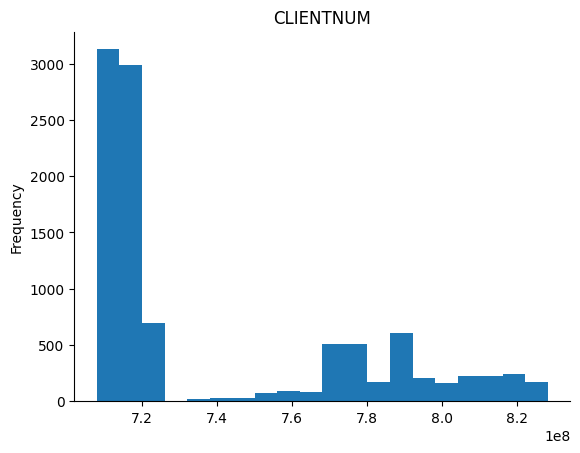

In [ ]:
from matplotlib import pyplot as plt
df['CLIENTNUM'].plot(kind='hist', bins=20, title='CLIENTNUM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

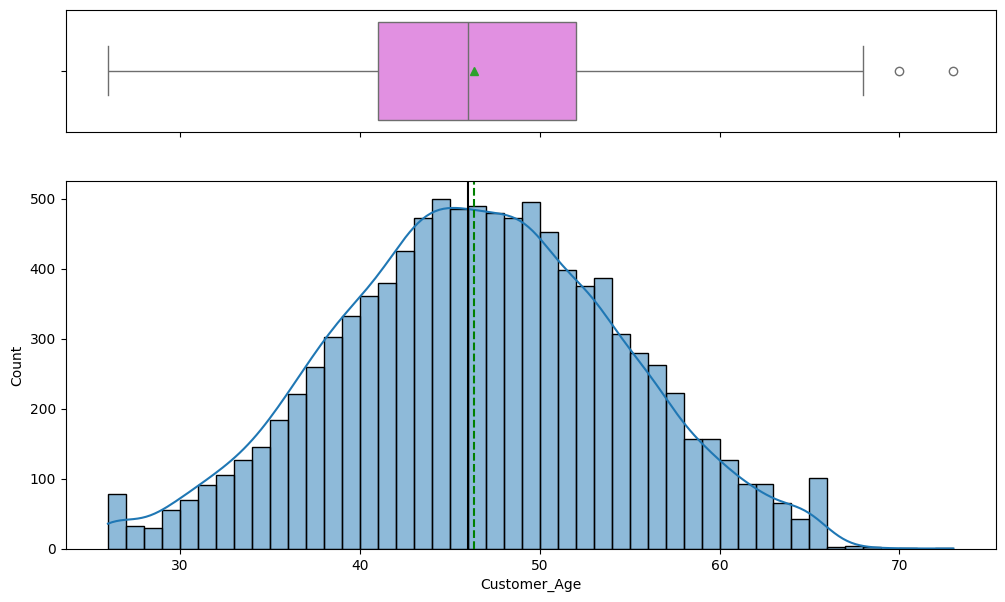

In [ ]:
histogram_boxplot(df, "Customer_Age", kde=True)

`Months_on_book`

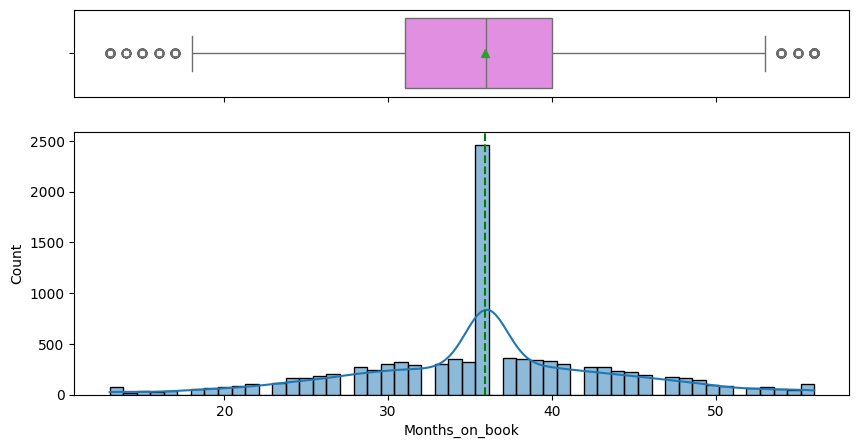

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: Pandas DataFrame
    feature: Name of the feature to visualize
    figsize: Figure size (default (12, 7))
    kde: Whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # figsize is assigned properly here

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # For histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")


# Correct usage with figsize:
histogram_boxplot(df, "Months_on_book", figsize=(10, 5), kde=True)

`Credit_Limit`

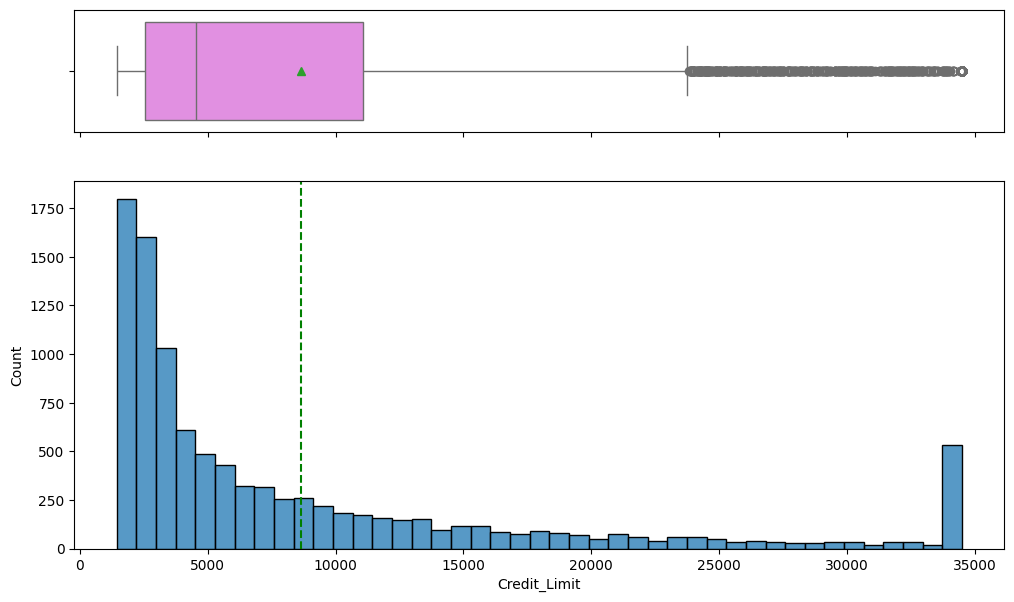

In [ ]:
histogram_boxplot(data, "Credit_Limit")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Revolving_Bal`

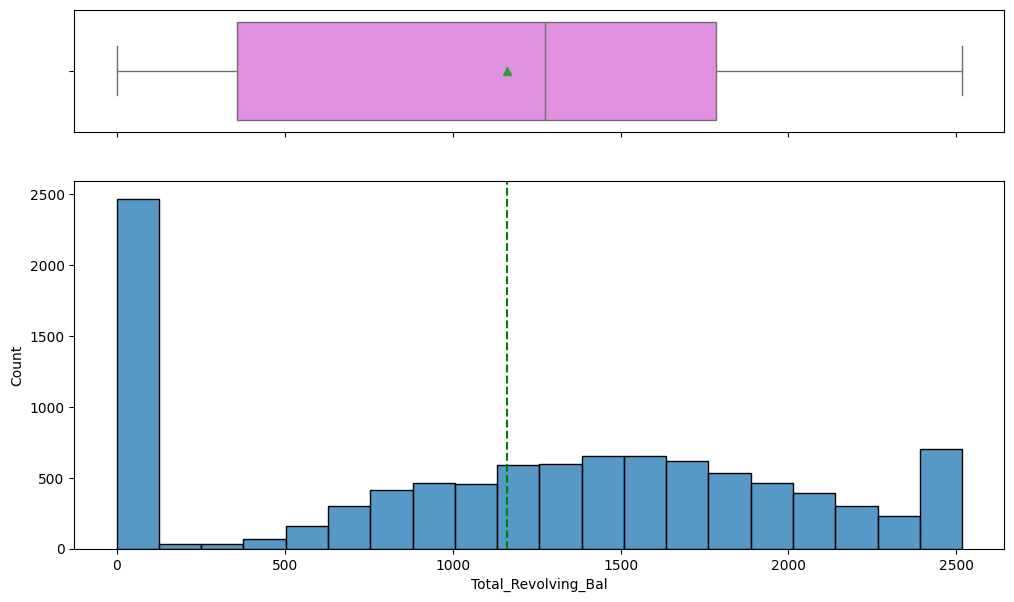

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Open_To_Buy`

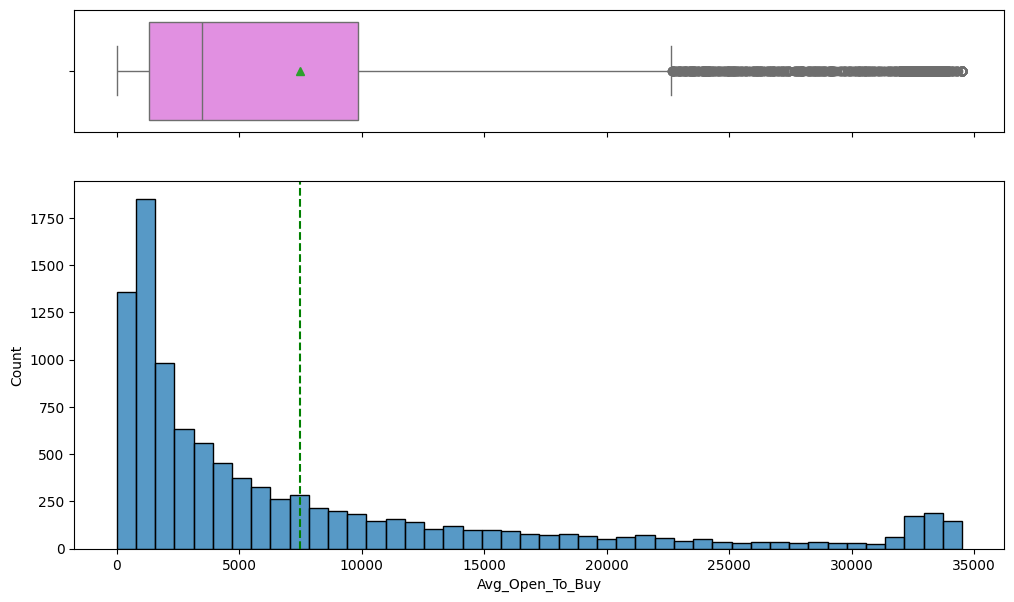

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Trans_Ct`

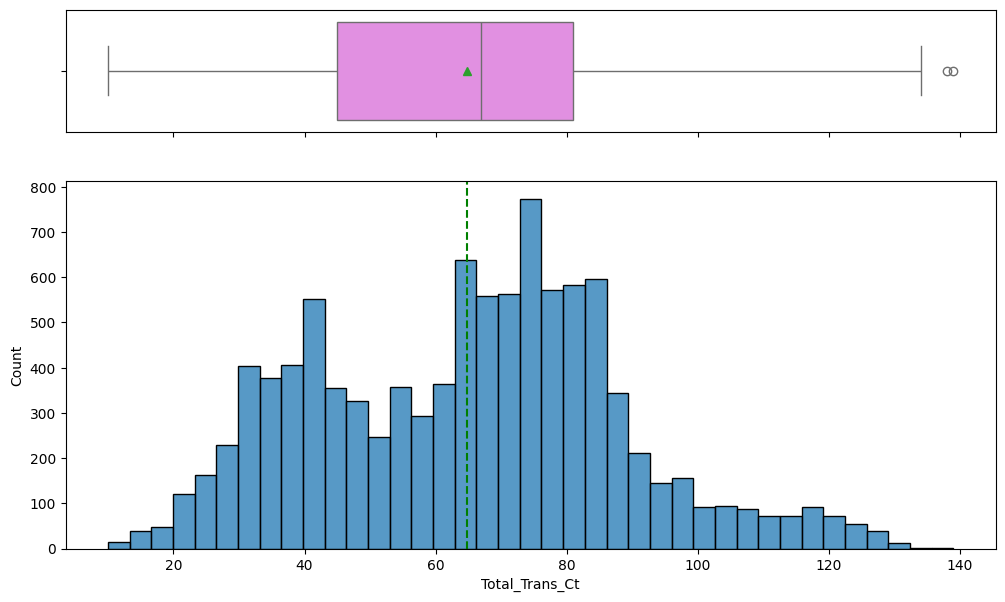

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Amt_Chng_Q4_Q1`

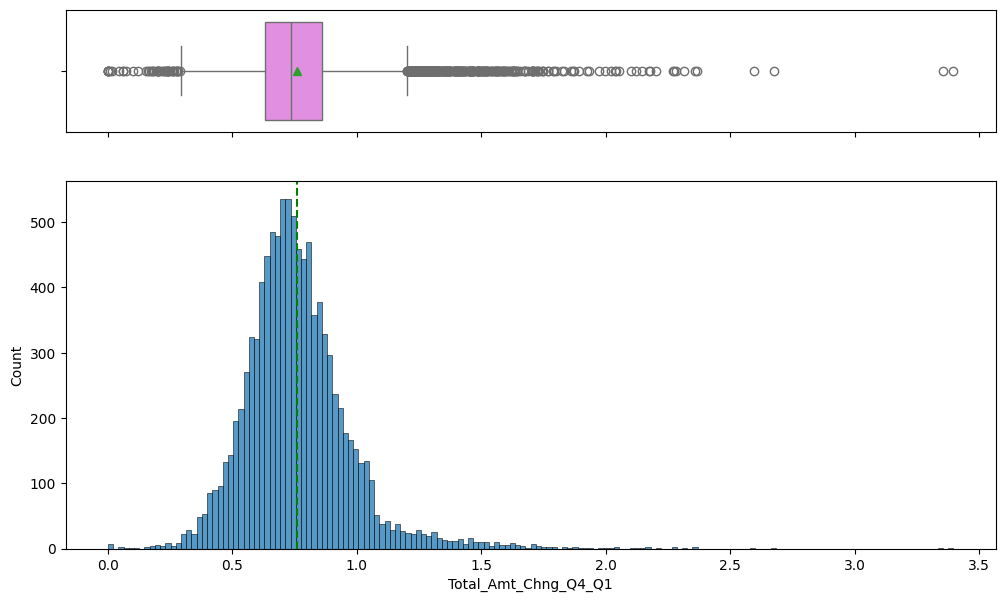

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")  ## Complete the code to create histogram_boxplot for 'New_Price'

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

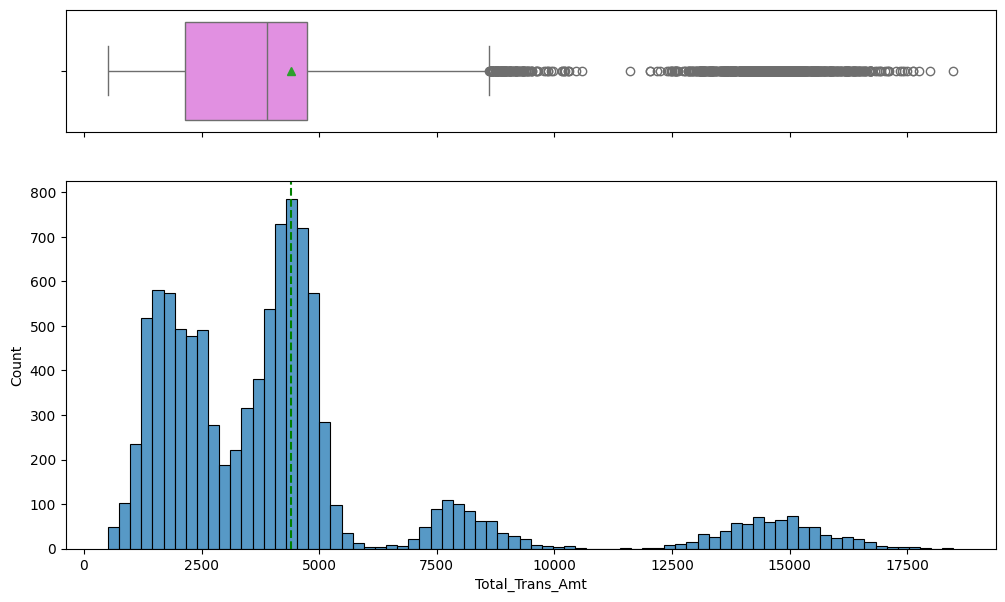

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt")

`Total_Ct_Chng_Q4_Q1`

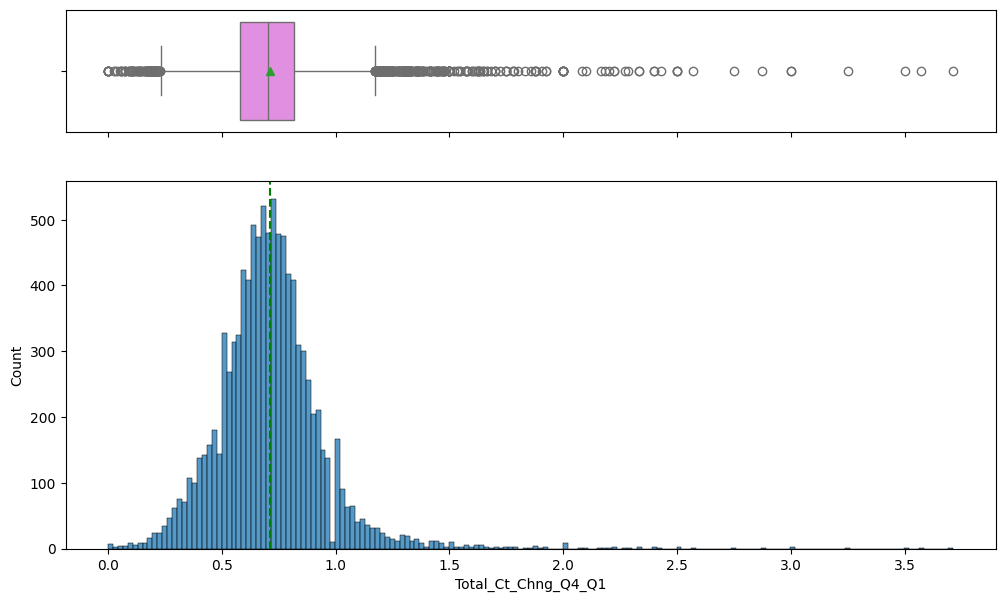

In [ ]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Utilization_Ratio`

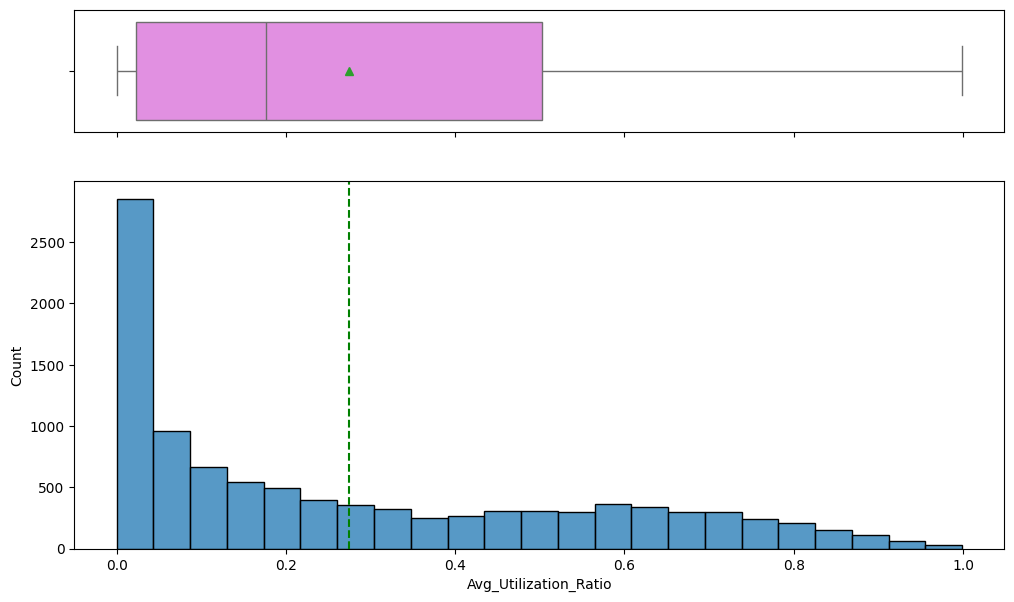

In [ ]:
histogram_boxplot(data, "Avg_Utilization_Ratio")  ## Complete the code to create histogram_boxplot for 'New_Price'

`Dependent_count`

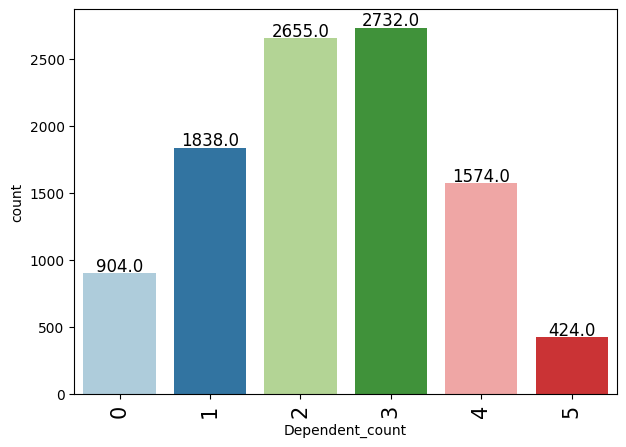

In [ ]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

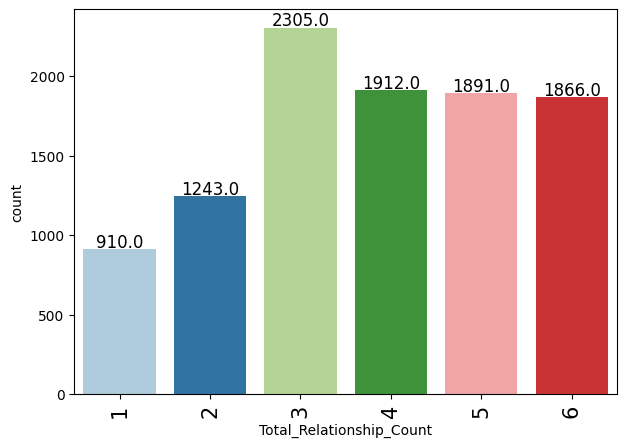

In [ ]:
labeled_barplot(data, "Total_Relationship_Count") ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

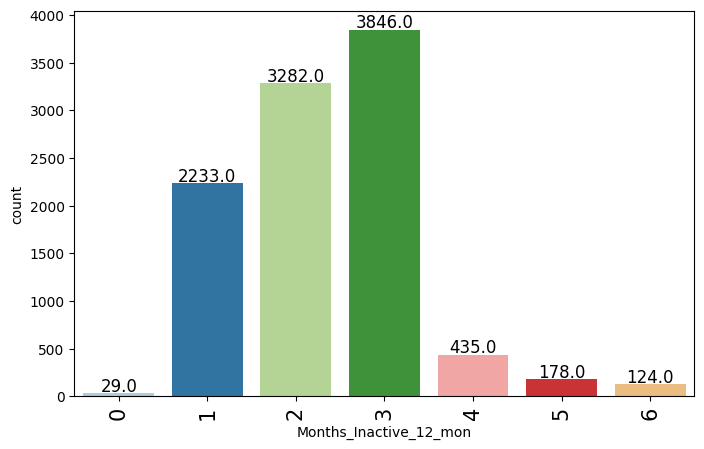

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon") ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

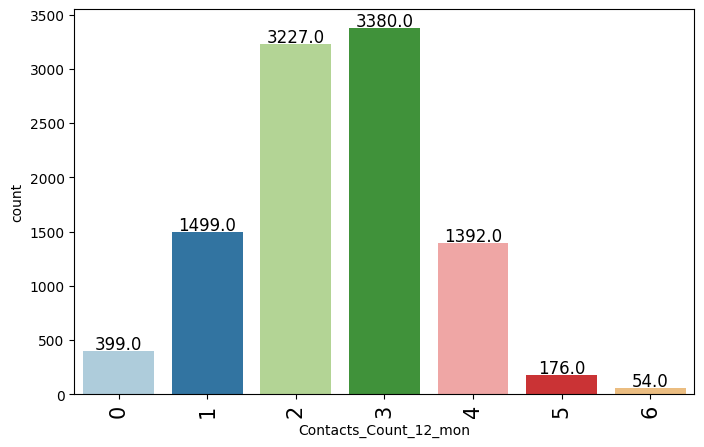

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon") ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

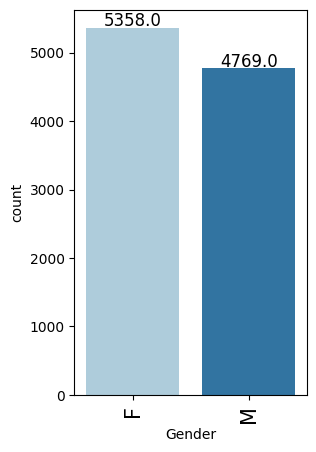

In [ ]:
labeled_barplot(data, "Gender") ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

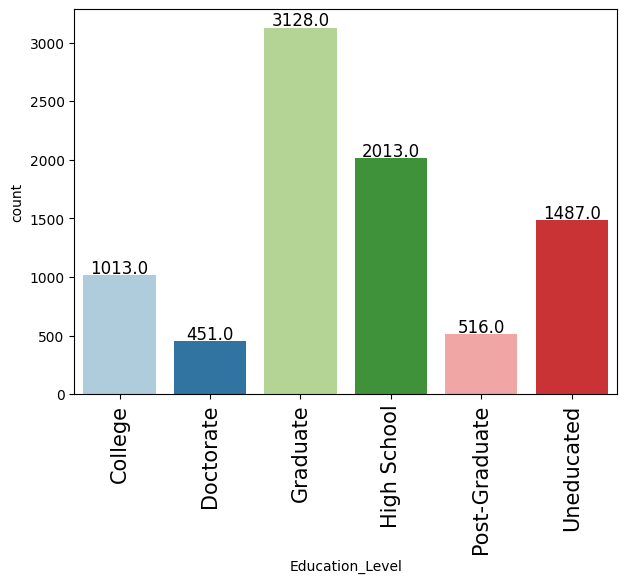

In [ ]:
labeled_barplot(data, "Education_Level") #Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

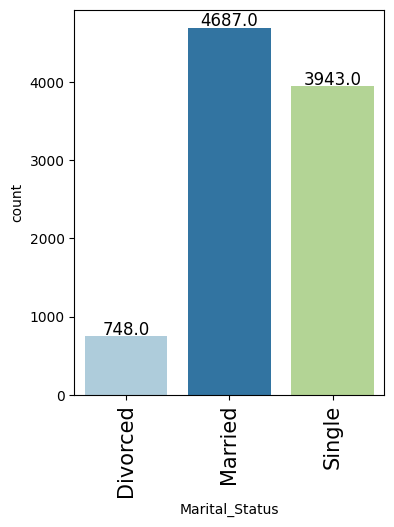

In [ ]:
labeled_barplot(data, "Marital_Status") ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

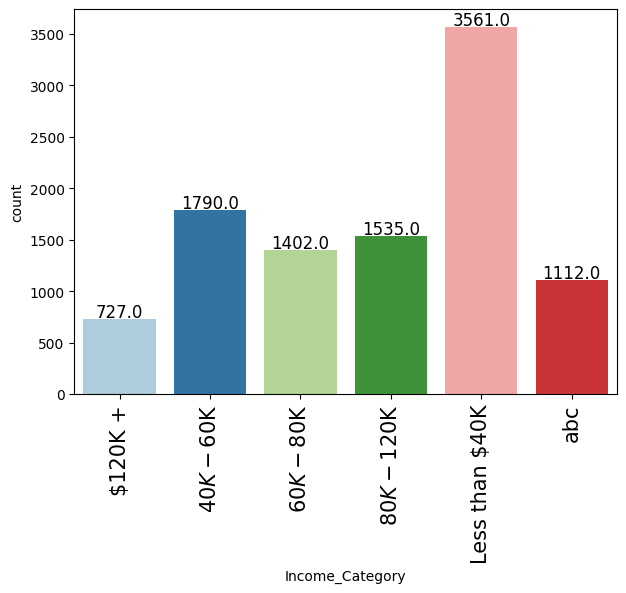

In [ ]:
labeled_barplot(data, "Income_Category") ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

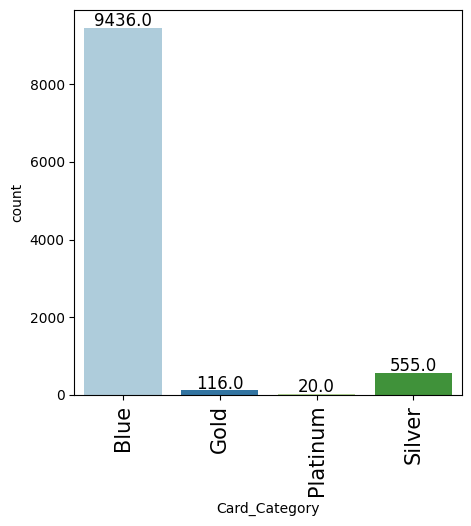

In [ ]:
labeled_barplot(data, "Card_Category") ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

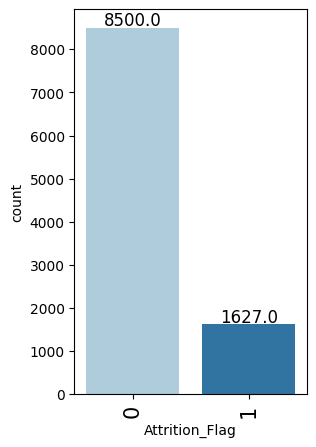

In [ ]:
labeled_barplot(data, "Attrition_Flag") ## Complete the code to create labeled_barplot for 'Attrition_Flag'

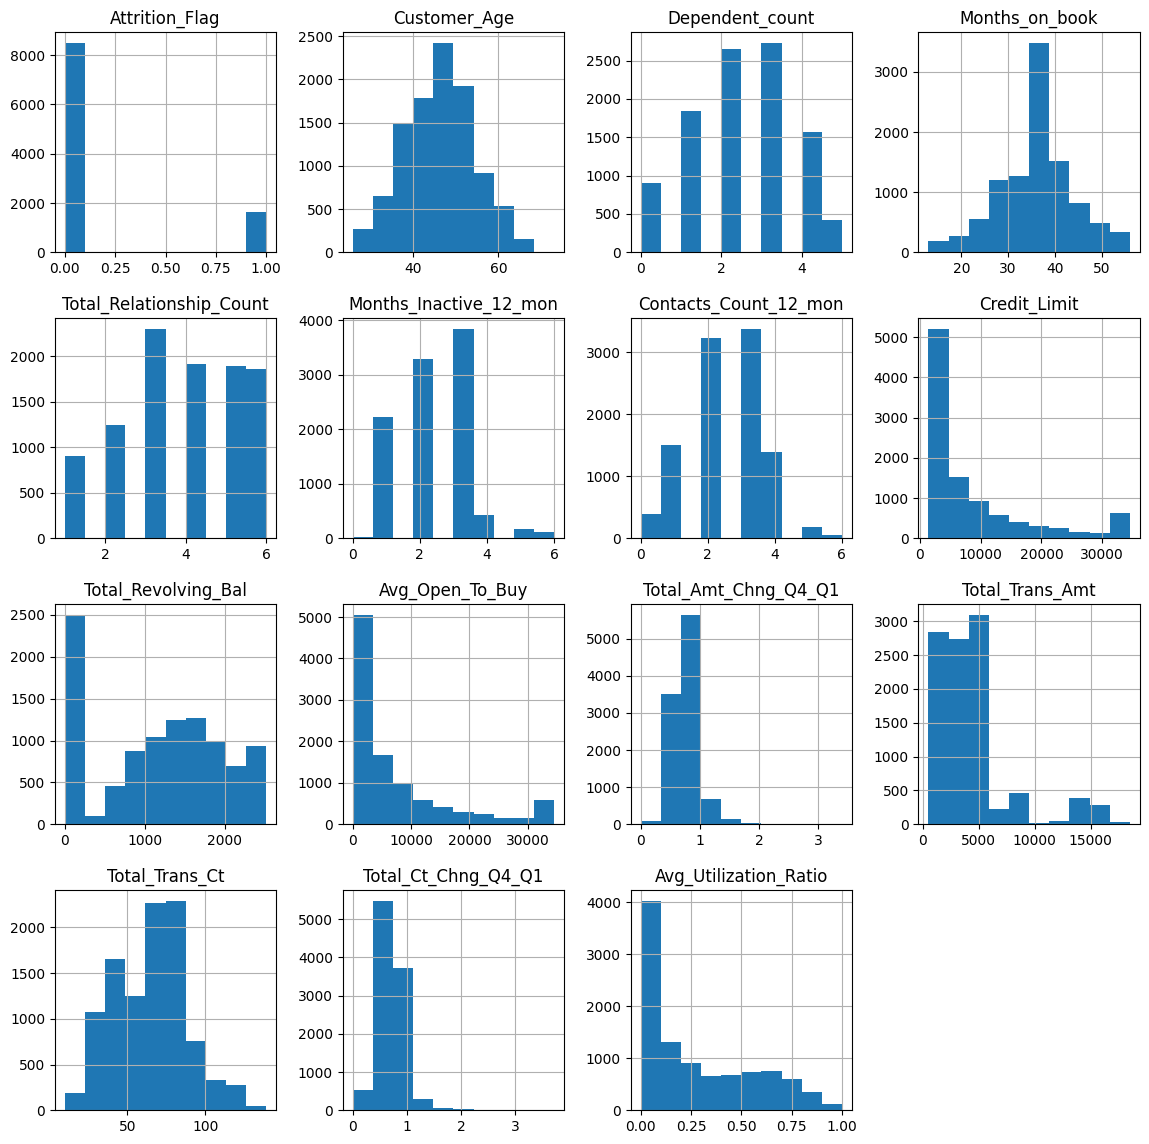

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

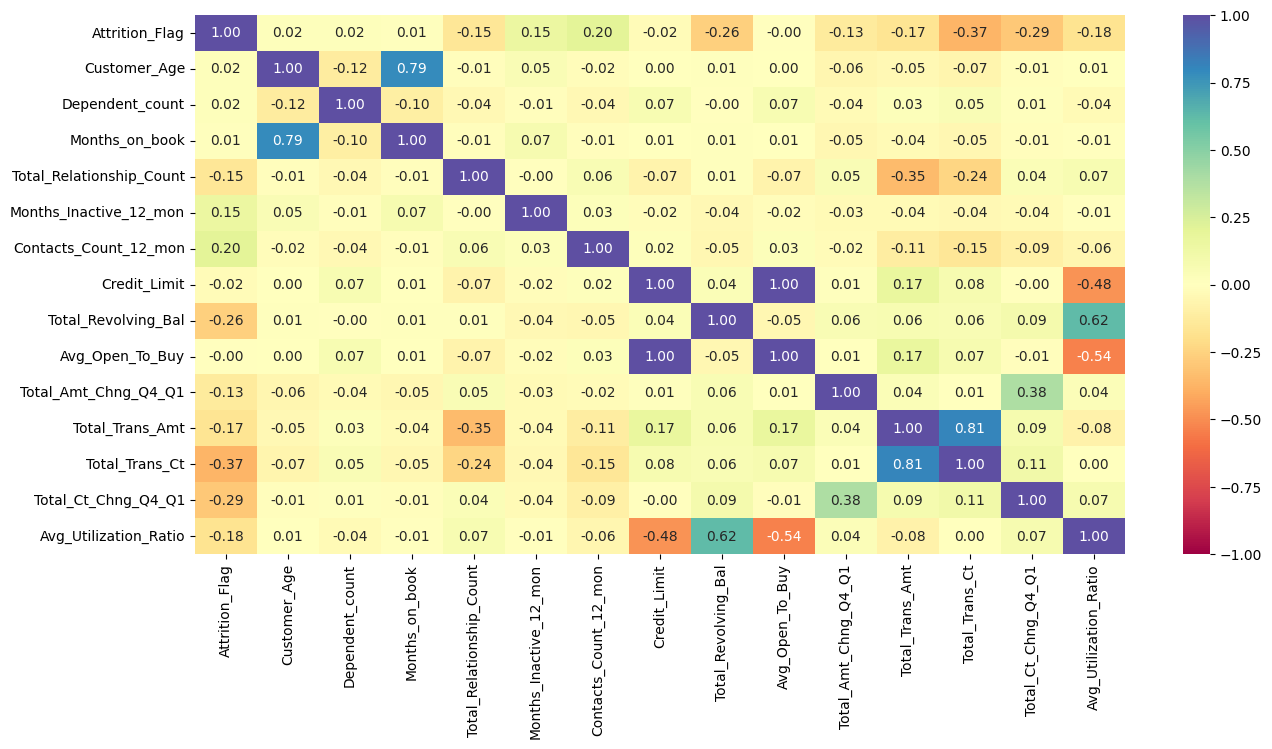

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


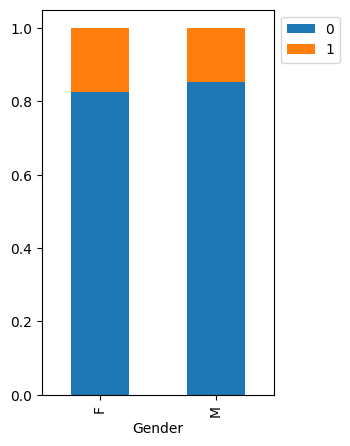

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target_optimized(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="magma")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="magma",
    )

    plt.tight_layout()
    plt.show()

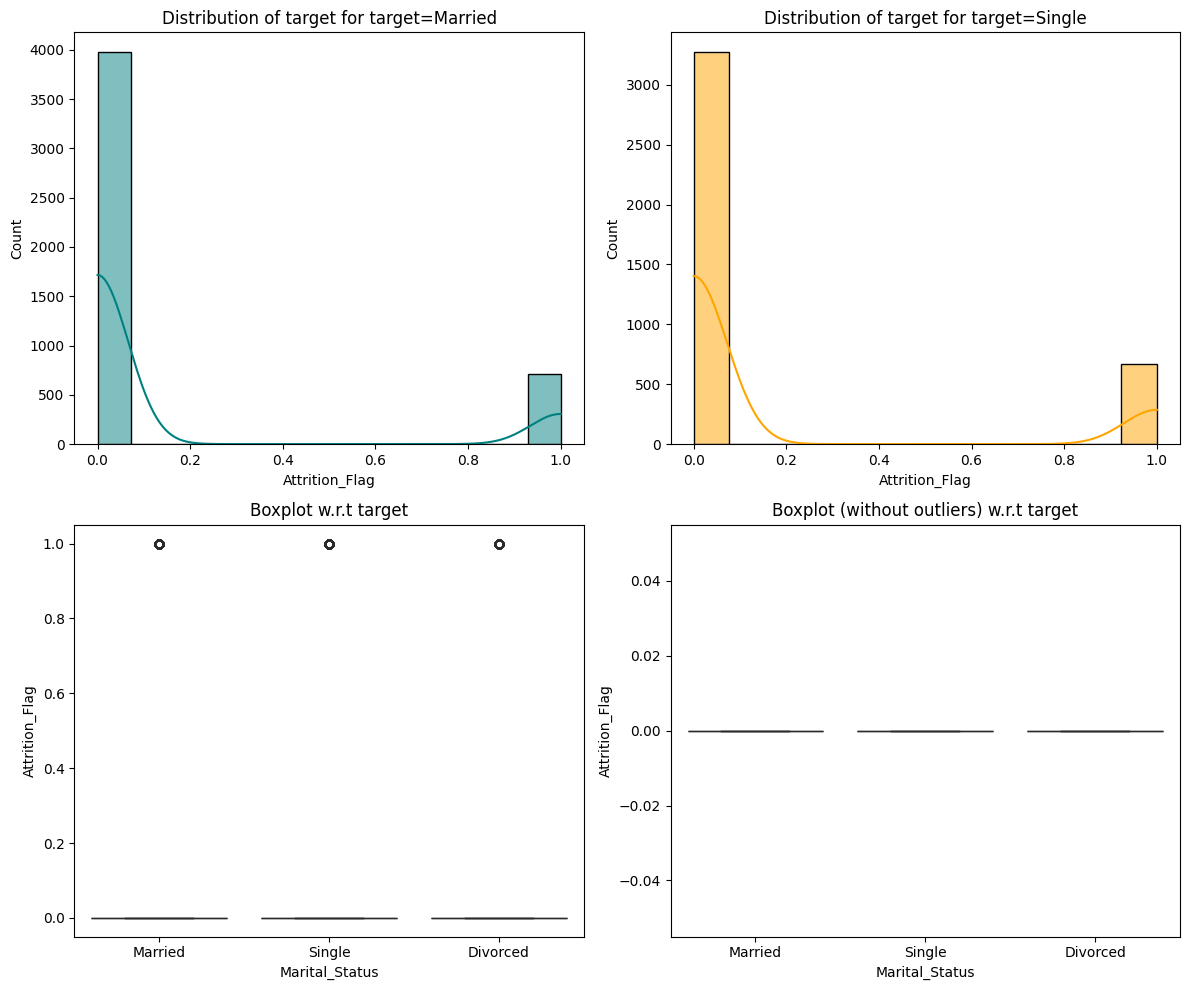

In [ ]:
distribution_plot_wrt_target_optimized(data, "Attrition_Flag", "Marital_Status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

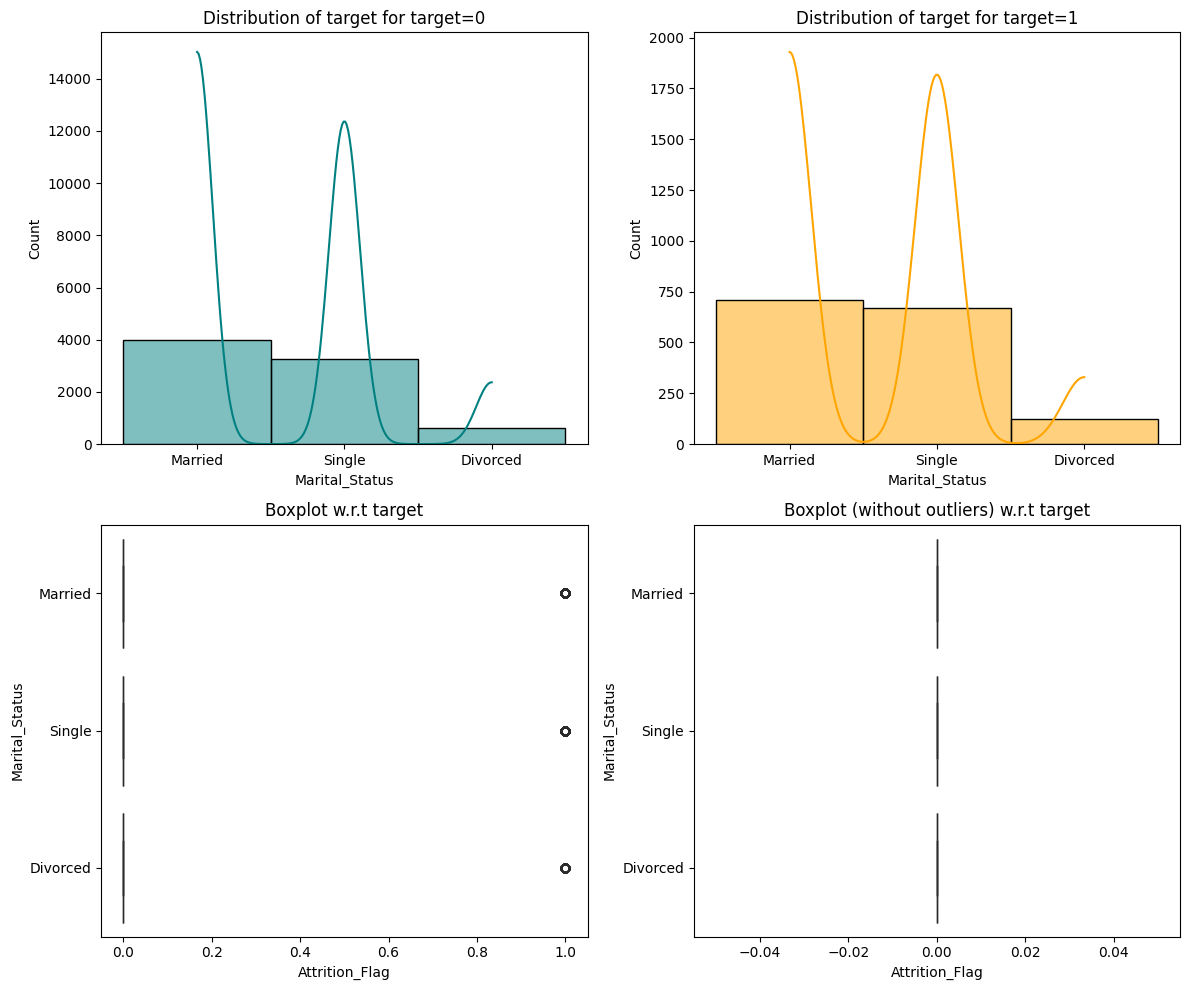

In [ ]:
distribution_plot_wrt_target_optimized(data, "Marital_Status", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

`Attrition_Flag vs Education_Level`

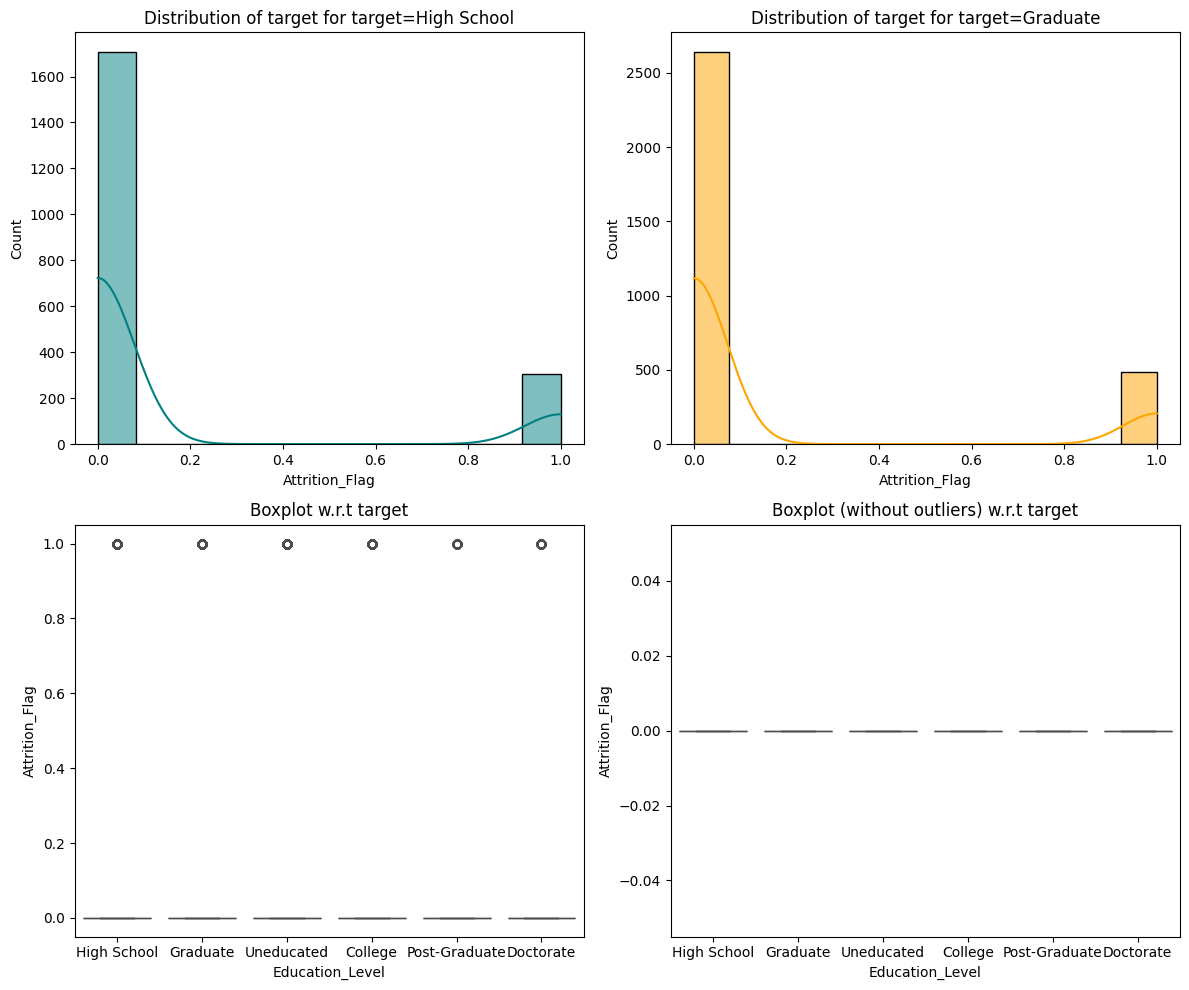

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Education_Level") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

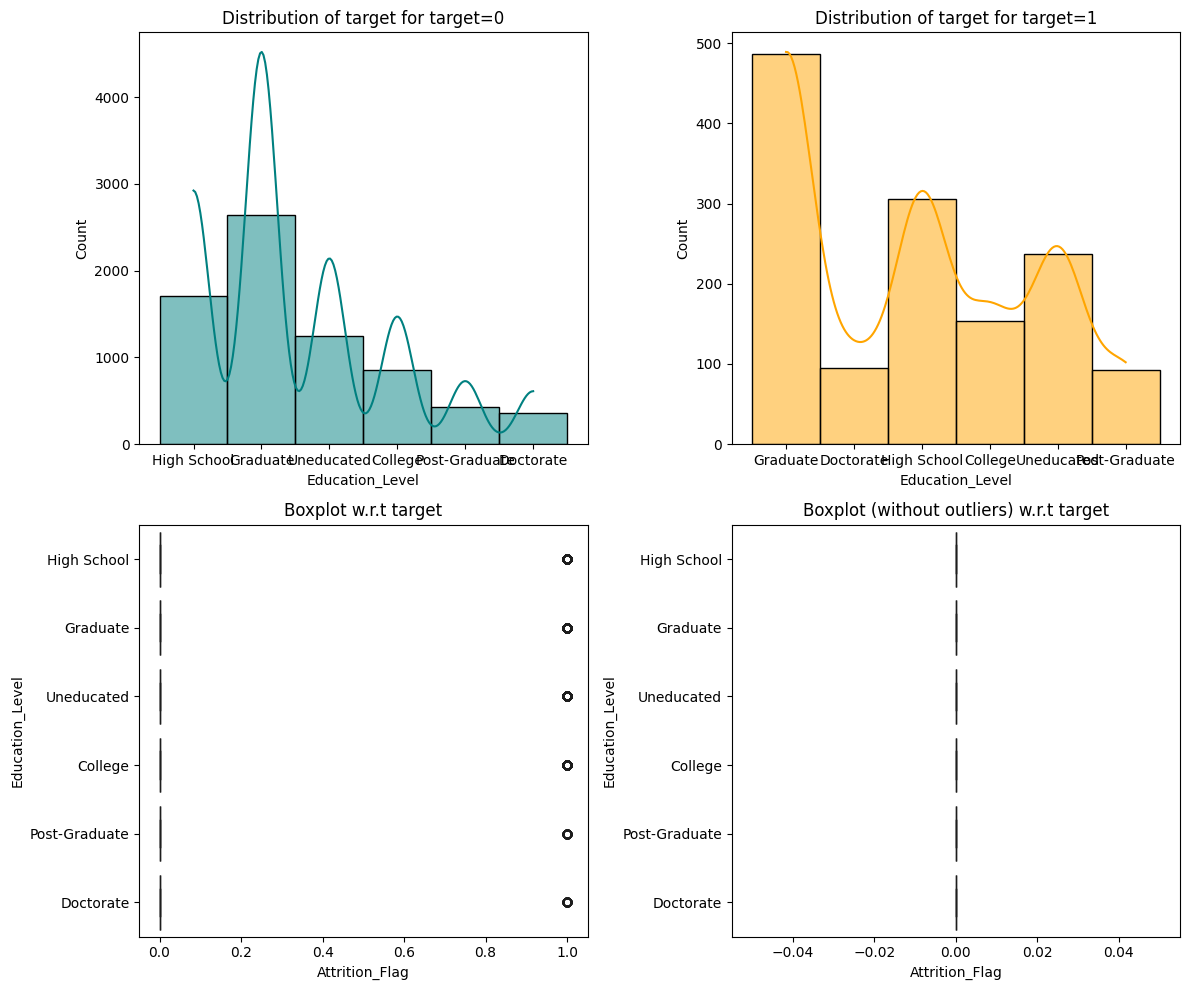

In [ ]:
distribution_plot_wrt_target_optimized(data,"Education_Level",  "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


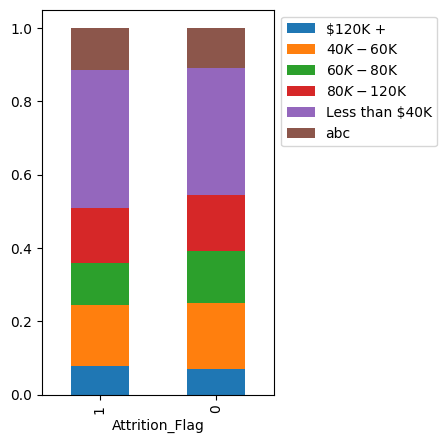

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

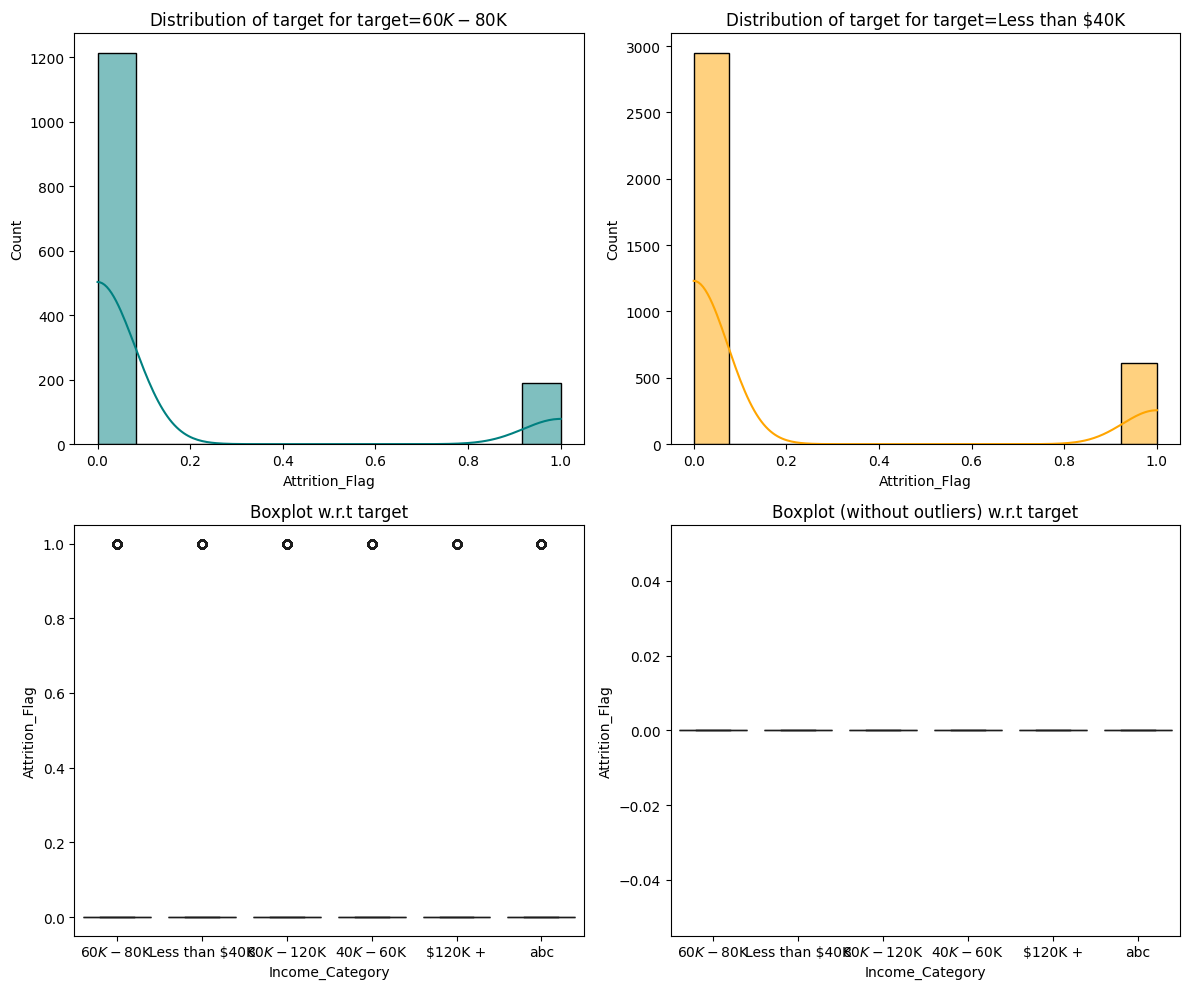

In [ ]:
distribution_plot_wrt_target_optimized(data,"Attrition_Flag", "Income_Category")

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


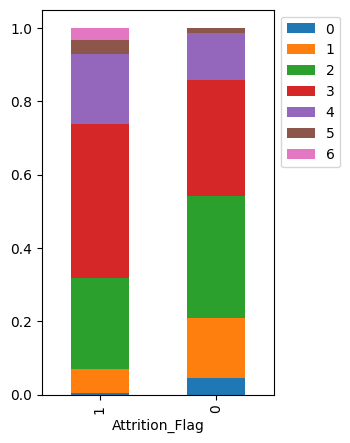

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


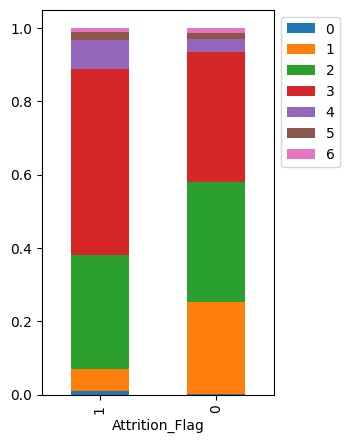

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


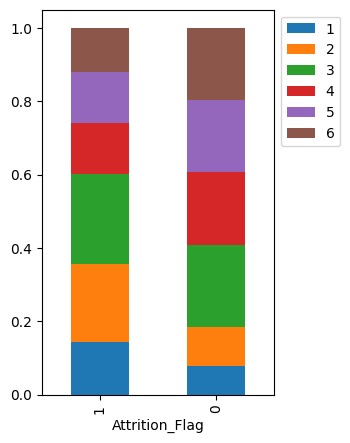

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


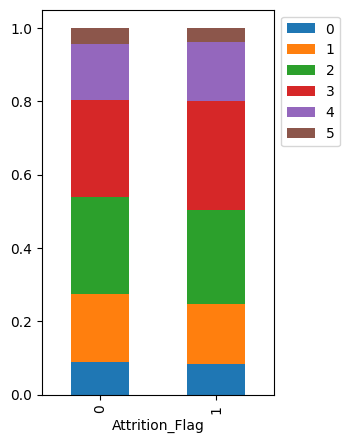

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

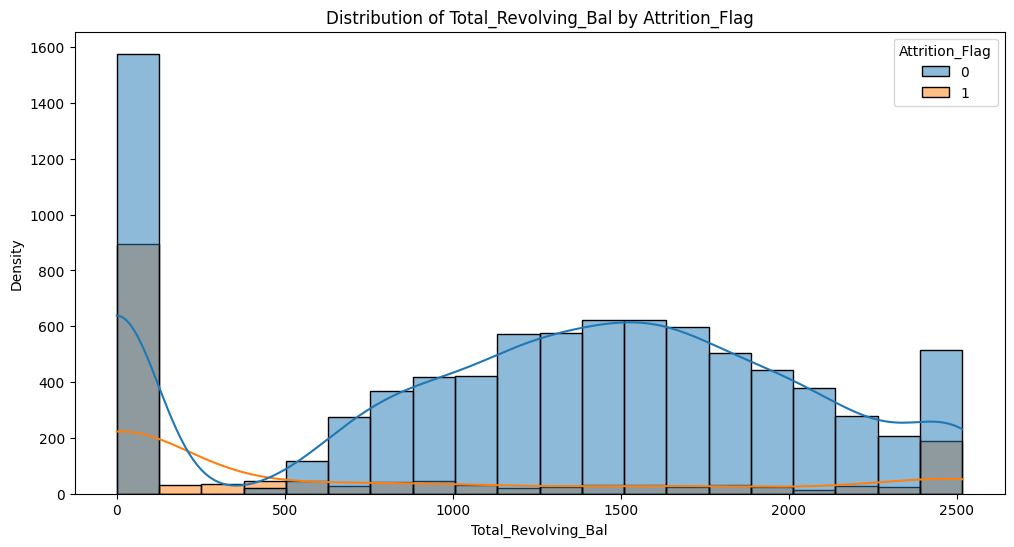

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def distribution_plot_wrt_target_optimized(data, predictor, target):
    """
    Creates a distribution plot of the predictor variable, colored by the target variable.

    Args:
        data: The dataframe containing the data.
        predictor: The name of the predictor variable column.
        target: The name of the target variable column.
    """

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the distribution plot using seaborn
    sns.histplot(data=data, x=predictor, hue=target, kde=True, ax=ax)

    # Set plot title and labels
    plt.title(f'Distribution of {predictor} by {target}')
    plt.xlabel(predictor)
    plt.ylabel('Density')
    plt.show()

# Assuming 'data' is your DataFrame
# Call the function like this:
distribution_plot_wrt_target_optimized(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

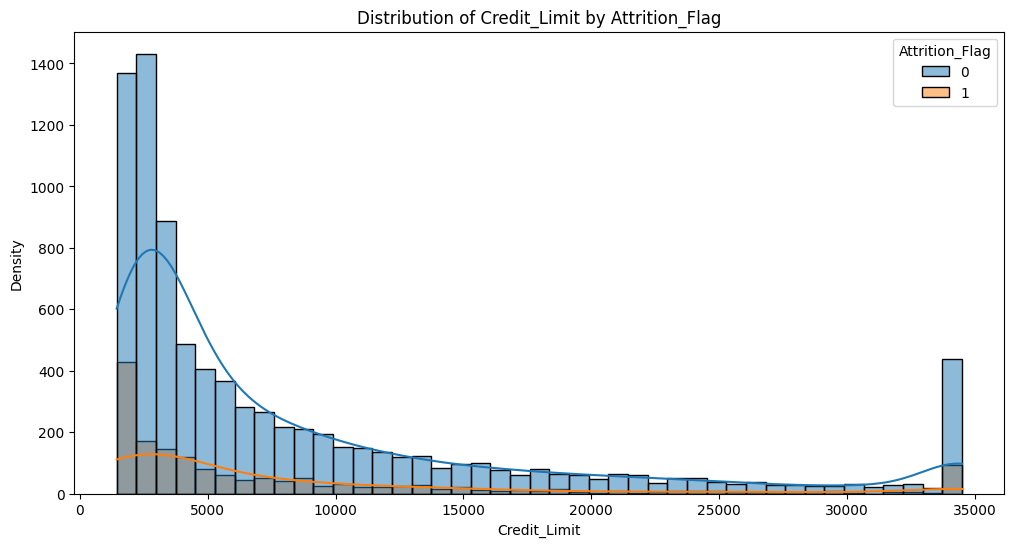

In [ ]:
distribution_plot_wrt_target_optimized(data, "Credit_Limit", "Attrition_Flag")
# Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

def distribution_plot_wrt_target_optimized(data, predictor, target):

    # Create subsets of data for each attrition flag value
    data_existing = data[data[target] == 0]  # Existing customers
    data_attrited = data[data[target] == 1]  # Attrited customers

    # Sample or filter the subsets if necessary (optional)
    # data_existing = data_existing.sample(frac=0.1, random_state=1)  # Sample 10%
    # data_attrited = data_attrited.sample(frac=0.1, random_state=1)  # Sample 10%

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data_existing, x=predictor, kde=True, ax=axs[0, 0], color="teal"
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data_attrited, x=predictor, kde=True, ax=axs[0, 1], color="orange"
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

`Attrition_Flag vs Customer_Age`

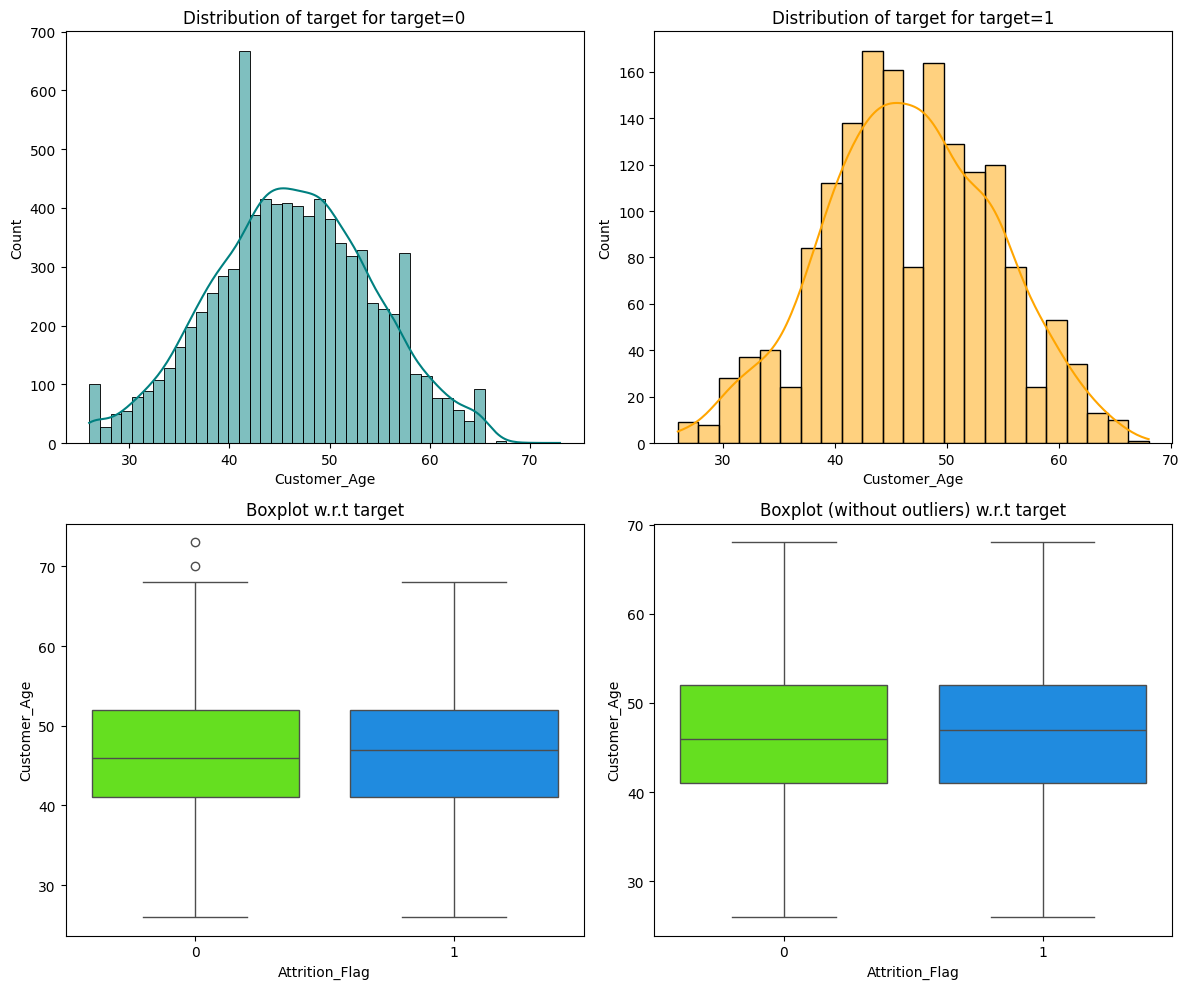

In [ ]:
distribution_plot_wrt_target_optimized(data, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

In [ ]:
# @title Looped Combination Iterations of Categorical Distributions #(Predictor and Target Variables) wrt Attained Education Level
#{"form-width":"100%","display-mode":"form"}
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming the function distribution_plot_wrt_target_optimized is already defined

# Define the categories
#categories = [
 #   "Attrition_Flag", "Customer_Age", "Gender", "Dependent_count",
  #  "Education_Level", "Marital_Status", "Income_Category",
   # "Card_Category", "Months_on_book", "Total_Relationship_Count",
   # "Months_Inactive_12_mon", "Contacts_Count_12_mon", #"Credit_Limit",
   # "Total_Revolving_Bal", "Avg_Open_To_Buy", #"Total_Amt_Chng_Q4_Q1",
   # "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1",
   # "Avg_Utilization_Ratio"
#]

# Loop through combinations of predictors and targets
#for target in categories:
 #   for predictor in categories:
  #      if predictor != target:  # Ensure predictor and target are not the same
   #         print(f"Plotting distribution of {predictor} with respect to {target}")
    #        distribution_plot_wrt_target_optimized(data, predictor, target, hue="Attrition_Flag", #margins="Education_Level")

def distribution_plot_wrt_target_optimized(data, predictor, target):

    # Create subsets of data for each attrition flag value
#    data_existing = data[data[target] == 0]  # Existing customers
#    data_attrited = data[data[target] == 1]  # Attrited customers

    # Sample or filter the subsets if necessary (optional)
    # data_existing = data_existing.sample(frac=0.1, #random_state=1)  # Sample 10%
    # data_attrited = data_attrited.sample(frac=0.1, #random_state=1)  # Sample 10%

    #fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    #target_uniq = data[target].unique()

    #axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    #sns.histplot(
     #   data=data_existing, x=predictor, kde=True, ax=axs[0, 0], c#olor="teal"
    #)

    #axs[0, 1].set_title("Distribution of target for target=" + str
    #(target_uniq[1]))
    #sns.histplot(
     #   data=data_attrited, x=predictor, kde=True, ax=axs[0, 1], #color="orange"
    #)

    #axs[1, 0].set_title("Boxplot w.r.t target")
    #sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], #palette="gist_rainbow")

    #axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    #sns.boxplot(
     #   data=data,
     #   x=target,
     #   y=predictor,
     #   ax=axs[1, 1],
     #   showfliers=False,
     #   palette="gist_rainbow",
    #)

    #plt.tight_layout()
    plt.show()

#**I Warned you, Didn't I?**

`Total_Trans_Ct` vs `Attrition_Flag`

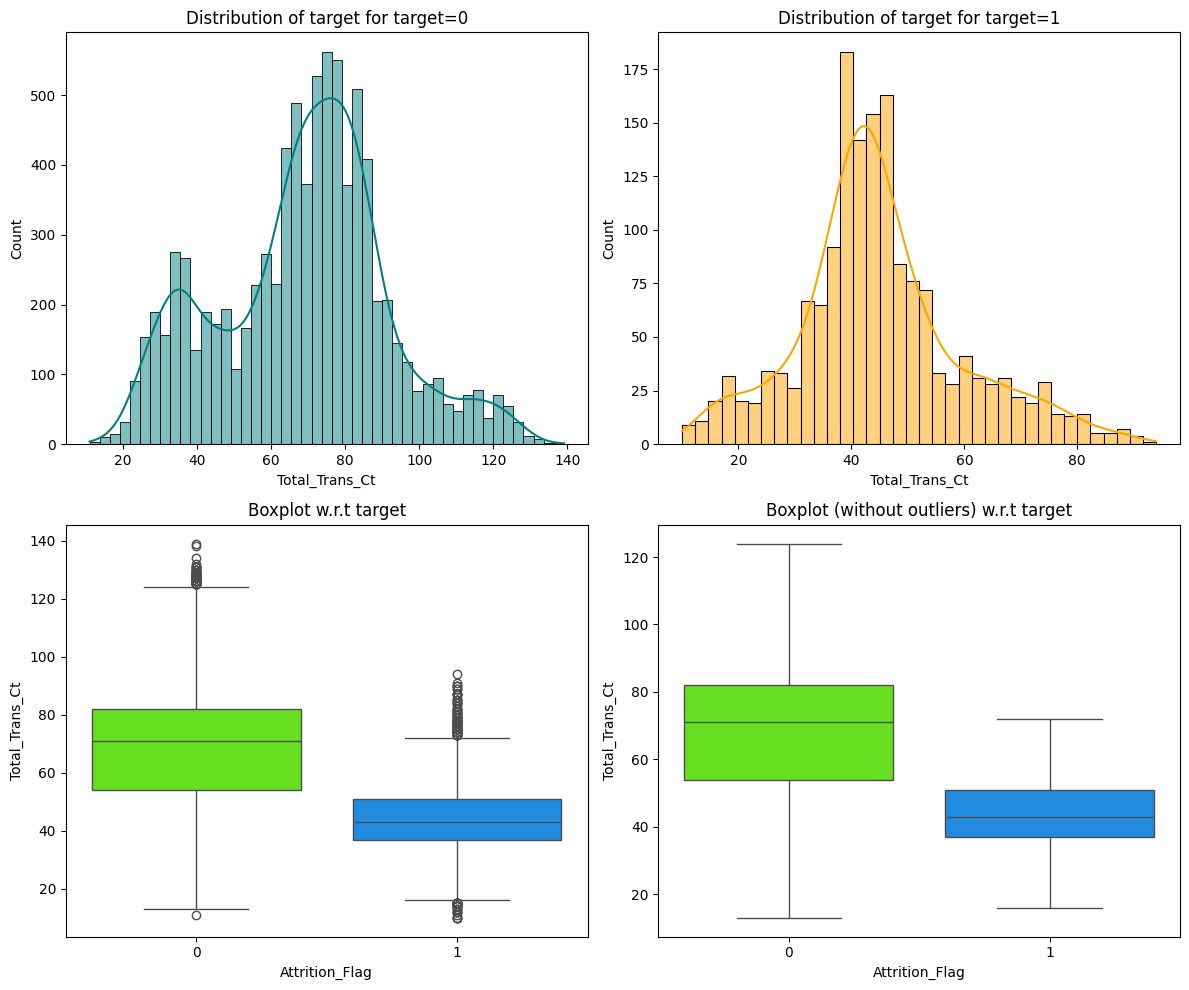

In [241]:
distribution_plot_wrt_target_optimized(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

In [ ]:
distribution_plot_wrt_target_optimized(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

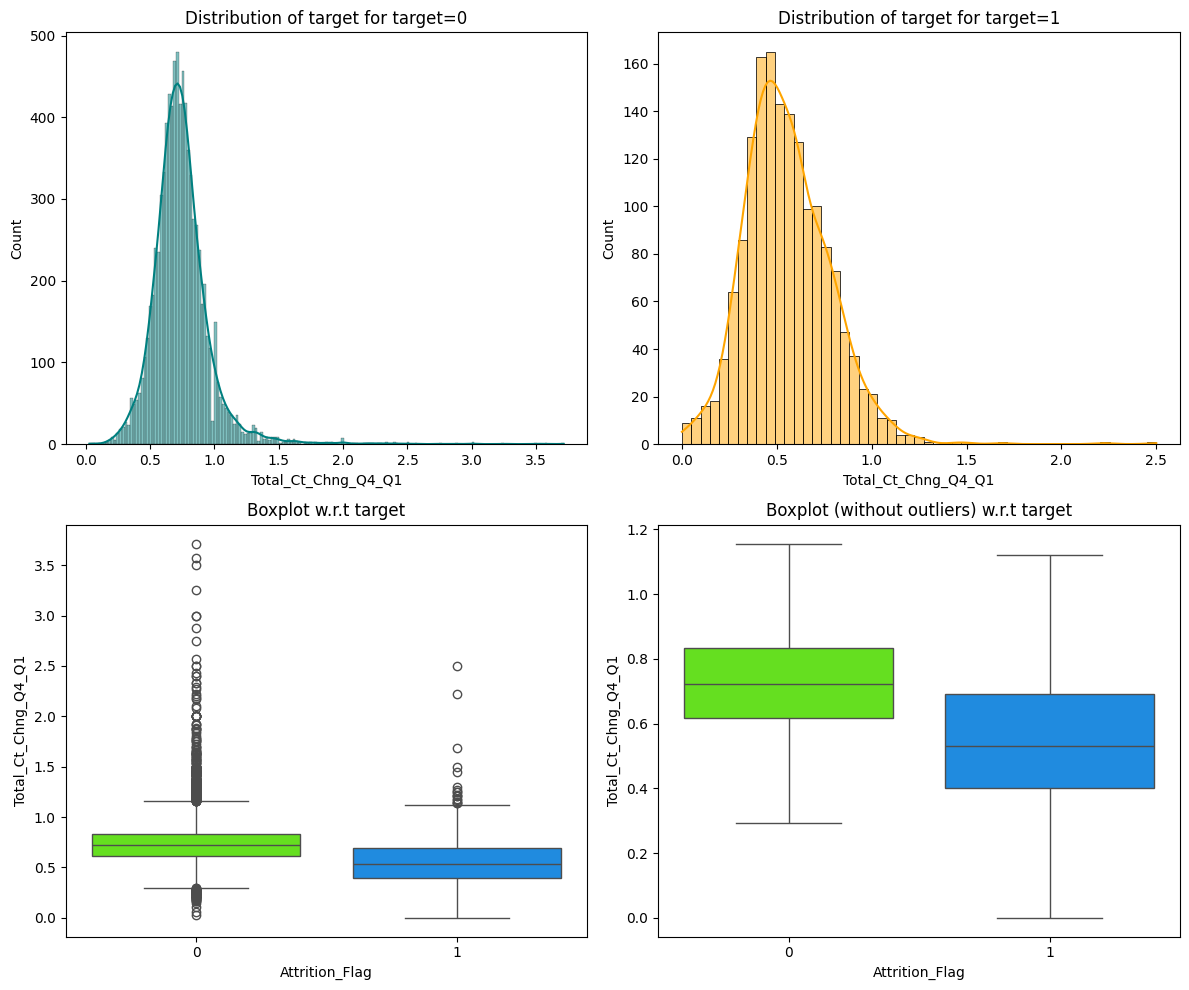

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

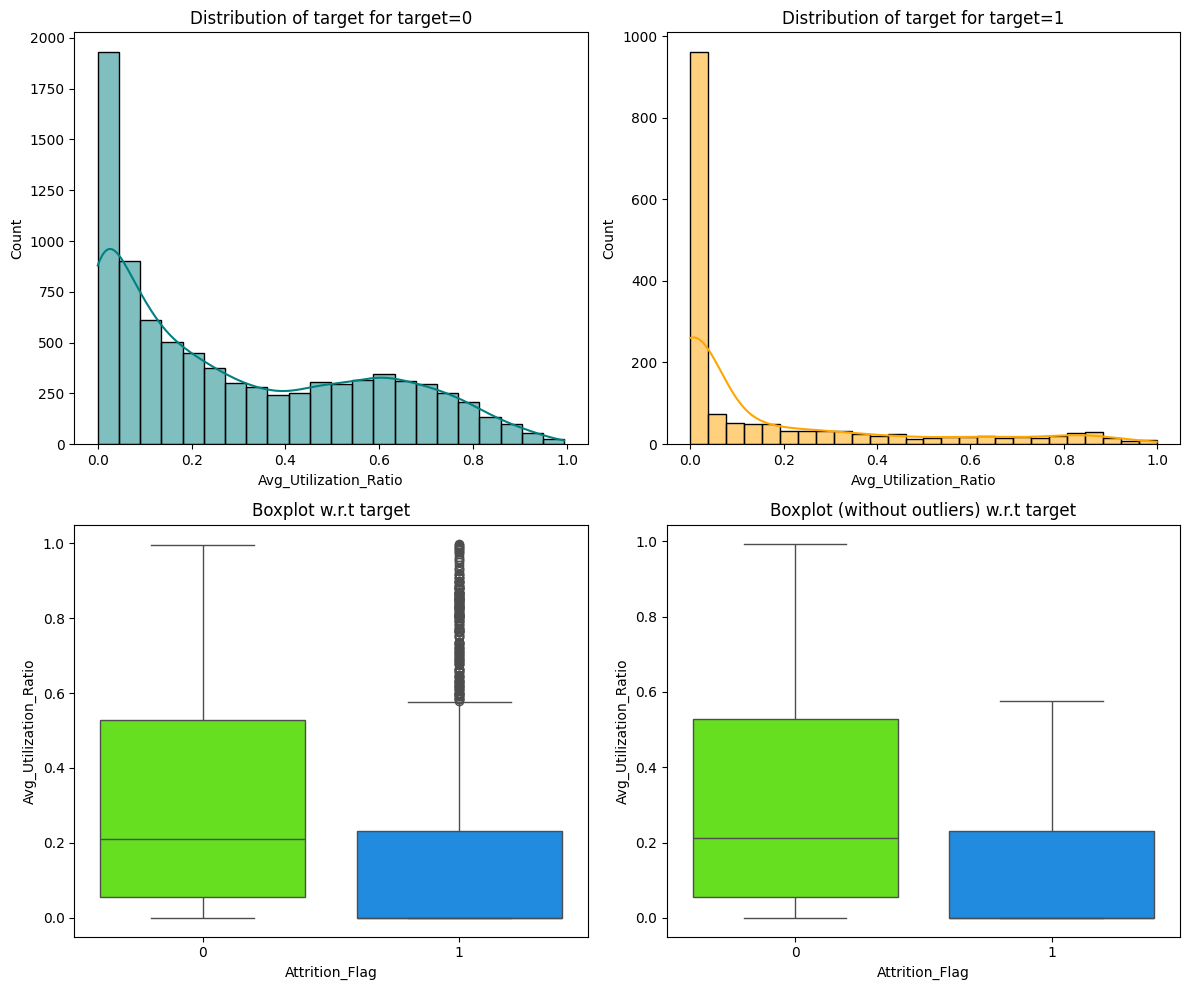

In [242]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

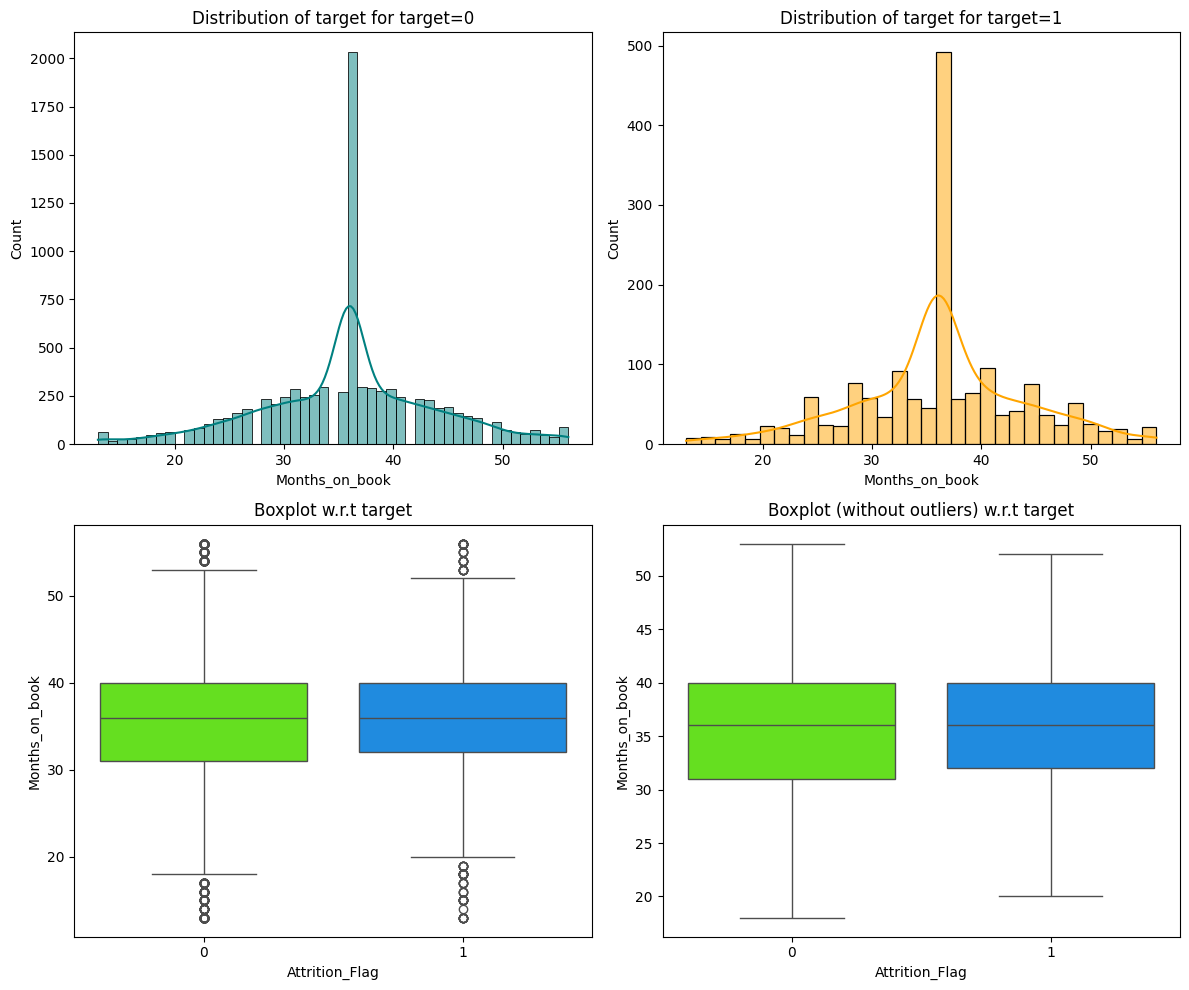

In [243]:
distribution_plot_wrt_target_optimized(data, "Months_on_book", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

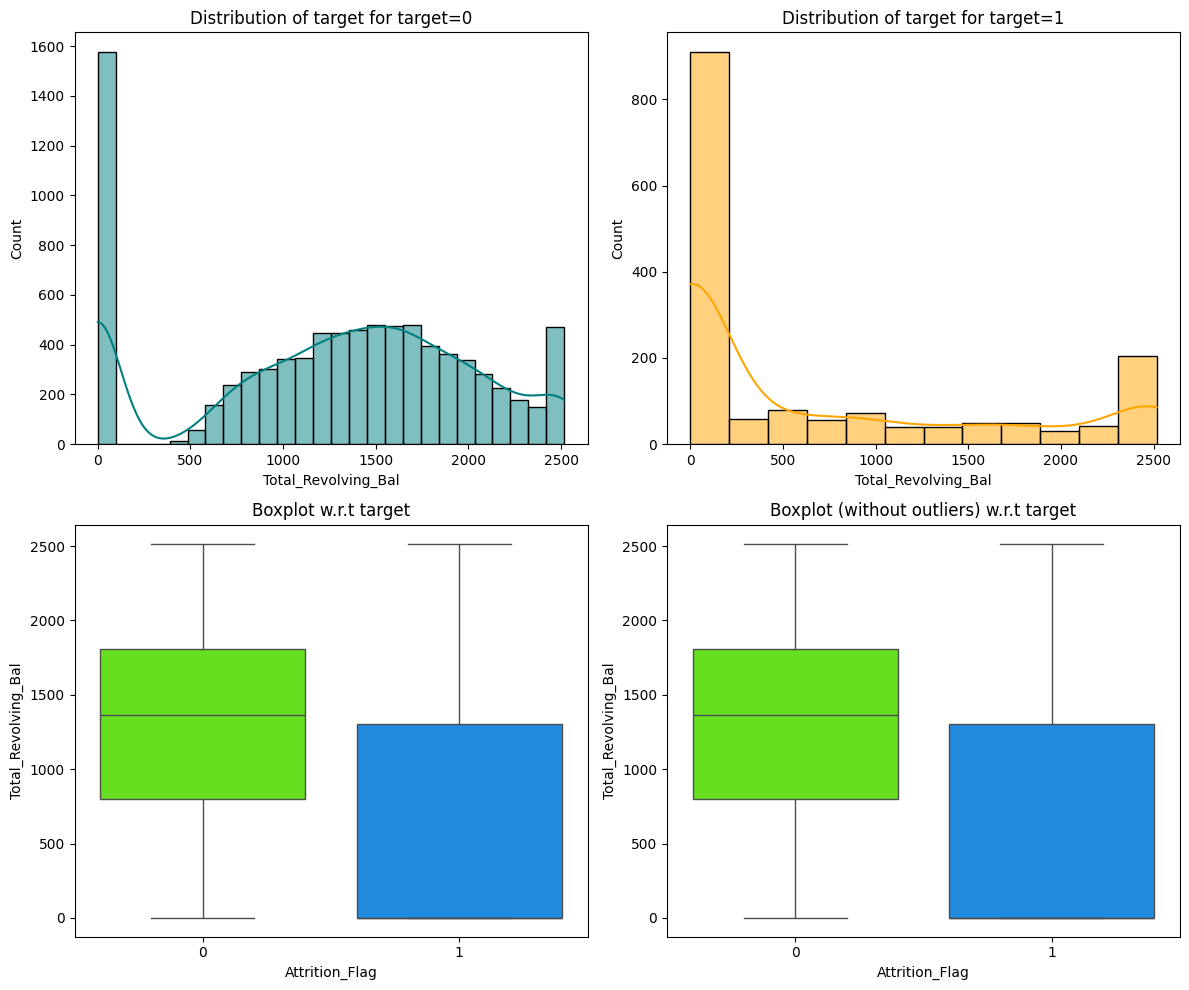

In [259]:
distribution_plot_wrt_target_optimized(data, "Total_Revolving_Bal", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

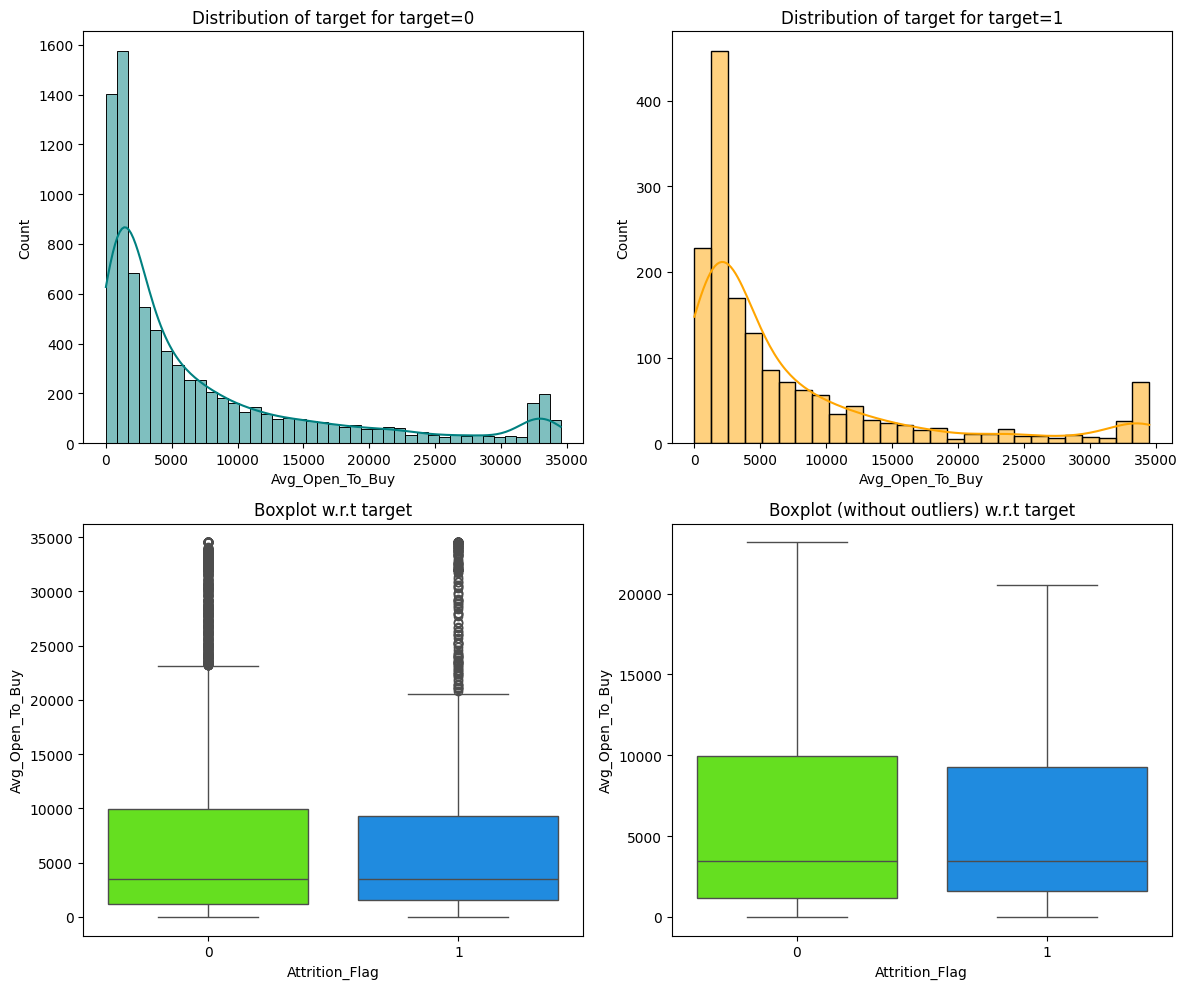

In [260]:
distribution_plot_wrt_target_optimized(data, "Avg_Open_To_Buy", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [ ]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
#data1["Income_Category"].replace("unknown", np.nan, inplace=True)
### complete the code to replace the anomalous values with NaN

In [ ]:
import numpy as np

# Replace anomalous values with NaN
#anomalous_values = ["unknown", "N/A", "not specified", "other"]
# Add any other values you consider anomalous
# data1["Income_Category"].replace(anomalous_values, np.nan, inplace=True)

In [ ]:
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


models = []
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))
models.append(("SVM", SVC(probability=True, random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
   model.fit(X_train, y_train)
   scores = recall_score(y_train, model.predict(X_train))
   print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



ValueError: could not convert string to float: 'F'

In [ ]:
data.head()

In [ ]:
# @title Average Utilization Ratio by Card Category and Gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Card_Category', y='Avg_Utilization_Ratio', hue='Gender', data=data, palette='Set2')
plt.xlabel('Card Category')
plt.ylabel('Average Utilization Ratio')
plt.title('Average Utilization Ratio by Card Category and Gender')
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) ## Complete the code to split the data into train test in the ratio 80:20
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  = imputer.transform(X_val[reqd_col_for_impute])    ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])   ## Complete the code to impute missing values in X_test

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F 4279 **(52.8%)**

M 3822 **(47.2%)**

Name: count, dtype: int64


---
# ** INTERESTING***
#Education_Level:

**Graduate 3733 (46.6%)**

#**High School 1619 (20.3%)**#

#**Uneducated 1171 (14.6%) ***#


**College 81(10.2%)**

**Post-Graduate 407 (5.1%)**

**Doctorate 355 **(4.4%)**


> Add blockquote


Name: count, dtype: int64



#Marital_Status:

Married 4346 **(53.5%)**

Single 3144 **(39.0%**)

Divorced 611 (7.5%)

Name: count, dtype: int64

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

In [ ]:
# Select categorical columns from X_train
categorical_cols = X_train.select_dtypes(["object", "category"])

# Iterate through each categorical column and print value counts
for col in categorical_cols.columns:
    print(f"Value counts for {col}:")
    print(X_train[col].value_counts())
    print("*" * 30)

### Encoding categorical variables

In [ ]:
print("X_val shape:", X_val.shape)
print("X_val data:", X_val.head())  # Display the first few rows

* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
from sklearn.linear_model import LogisticRegression

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score

# Assuming 'df' is your DataFrame with already one-hot encoded columns

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


models = []
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))
models.append(("SVM", SVC(probability=True, random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1))) # Added Logistic Regression
models.append(("SVM", SVC(probability=True, random_state=1))) # Added SVM
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1))) # Added Gradient Boosting


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train) # Assumes X_train and y_train are defined elsewhere
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))


### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
from sklearn import metrics
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
%%time
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1)]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,
                                  param_distributions=param_grid,
                                  n_jobs=-1,
                                  n_iter=50,
                                  scoring=scorer,  # Correct usage of scorer
                                  cv=5,
                                  random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=___,
    n_estimators= _______, learning_rate= _______, estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.'_______' ## Complete the code to fit the model on original data

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, ______, _____) ## Complete the code to check the performance on training set
adb_train

In [ ]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, ______, _____) ## Complete the code to check the performance on validation set
adb_val

#### Tuning Ada Boost using undersampled data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=___,
    n_estimators= _______, learning_rate= _______, estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.'_______' ## Complete the code to fit the model on undersampled data

In [ ]:
adb2_train = '_______' ## Complete the code to check the performance on training set
adb2_train

In [ ]:
# Checking model's performance on validation set
adb2_val =  '_______' ## Complete the code to check the performance on validation set
adb2_val

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=_______,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

In [ ]:
gbm1_train = '_______' ## Complete the code to check the performance on undersampled train set
gbm1_train

In [ ]:
gbm1_val = '_______' ## Complete the code to check the performance on validation set
gbm1_val

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=_______,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
gbm2_train = '_______' ## Complete the code to check the performance on oversampled train set
gbm2_train

In [ ]:
gbm2_val = '_______' ## Complete the code to check the performance on validation set
gbm2_val

#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=____,
    scale_pos_weight=____,
    n_estimators=____,
    learning_rate=______,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

In [ ]:
xgb_train = '_______' ## Complete the code to check the performance on original train set
xgb_train

In [ ]:
xgb_val = '_______' ## Complete the code to check the performance on validation set
xgb_val

## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

'_______' ## Write the code to compare the performance on validation set

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
'_______' ## Write the code to check the performance of best model on test data

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  '_______' ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


After calculating the number of possible combinations of Categorical Features to measurable Distributable Target, with respect to their potential Variables and Predictors, it is advised to best decide on a method for narrowing down the categorical associations to find which would be most useful for our purpose of model building.  


The proper methodology for model prediction suggests that we should focus our analysis on a few key strategies:


**1. Feature Importance Analysis:**

•	Use techniques like Random Forest or Gradient Boosting to determine which features (predictors) have the most significant impact on the target variable. This can help researchers identify the most critical categories for potential model.

**2. Correlation Analysis:**
•	For numerical predictors, one can calculate correlation coefficients with the target variable. For categorical variables, one can use Chi-Squared tests to assess the relationship between categorical predictors and the target.

**3. Domain Knowledge:**
•	Leverage domain expertise to identify which features are likely to be most relevant based on the context of the desired analysis.


**4. Recursive Feature Elimination (RFE):**

•	This technique can help you systematically remove less important features and retain those that contribute most to the model's performance.



Therefore, When deciding whether to drop categorical features like "CARD_CATEGORY" before splitting your dataset into training and test sets, it's important to consider the implications of your choices on model performance and data integrity. Here’s a breakdown of the considerations and best practices:


**1. Dropping Categorical Features Before Splitting:**

•	Correctness: Dropping a feature like "CARD_CATEGORY" before splitting is generally acceptable if you have a valid reason for doing so (e.g., it is not relevant to your analysis or model). However, you should ensure that this decision is based on a thorough understanding of the feature's importance.
•	Impact on Data: If you drop a feature before splitting, it will not be available for either the training or test datasets, which is fine if you are confident it won't contribute to your model's predictive power.

**2. One-Hot Encoding:**

•	When to Encode: One-hot encoding should typically be done after splitting the data. This is to prevent data leakage, where information from the test set influences the training process. If you encode before splitting, the model might learn patterns from the test set that it shouldn't have access to.
•	Handling Categorical Variables: If you have multiple categorical variables, you can drop one of the categories during one-hot encoding (using drop_first=True) to avoid the dummy variable trap.

**3. Best Practices:**

•	Feature Selection: Before dropping any features, consider performing exploratory data analysis (EDA) to understand the significance of each feature. You can use techniques like correlation analysis, feature importance from models, or domain knowledge.
•	Imputation and Encoding: After dropping irrelevant features, handle missing values (if any) and then perform one-hot encoding on the categorical variables. This should be done after splitting the data to ensure that the model does not have access to the test data during training.
#**Recommended Workflow**
1.	Initial Data Cleaning:
o	Replace anomalous values with NaN.
o	Drop any features that are not relevant based on your analysis.
2.	Split the Data:
o	Split your dataset into training and validation/test sets.
3.	Impute Missing Values:
o	Fit an imputer on the training data and transform both the training and validation/test datasets.
4.	One-Hot Encoding:
o	Apply one-hot encoding to the categorical features in both the training and validation/test datasets.
5.	Reindexing:
o	Ensure that the validation and test datasets have the same columns as the training dataset after encoding.



-


***